In [14]:
import sqlite3
import os

import pandas as pd
import matplotlib.pyplot as plt

In [36]:
db_path = 'dbs'

db_files = []
for root, dirs, files in os.walk(db_path):
    for file in files:
        if file.endswith('.db'):
            db_files.append(os.path.join(root, file))

In [13]:
path = db_files[0]

with sqlite3.connect(path) as connection:

    cursor = connection.cursor()

    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    table_name = 'data'
    query = f'SELECT * FROM {table_name}'
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]

    df = pd.read_sql_query(f'SELECT * FROM {table_name};', connection)
    print(df.head())

                  time  channel_1  channel_2  channel_3  channel_4  channel_5  \
0  2024-12-09 15:05:34       57.0       26.0      233.0       43.0      161.0   
1  2024-12-09 15:05:35       59.0       26.0      201.0       26.0      172.0   
2  2024-12-09 15:05:35       57.0       26.0      186.0       31.0      165.0   
3  2024-12-09 15:05:35       58.0       26.0      186.0       31.0      165.0   
4  2024-12-09 15:05:35       57.0       26.0      172.0       64.0      161.0   

   channel_6  channel_7  channel_8  channel_9  channel_10  channel_11  \
0      289.0       56.0       26.0      201.0        44.0       164.0   
1      289.0       62.0       29.0      198.0        17.0       168.0   
2      289.0       57.0       26.0      163.0        40.0       160.0   
3      289.0       57.0       26.0      163.0        40.0       160.0   
4      289.0       65.0       30.0      193.0        85.0       175.0   

   channel_12  
0       289.0  
1       289.0  
2       289.0  
3       28

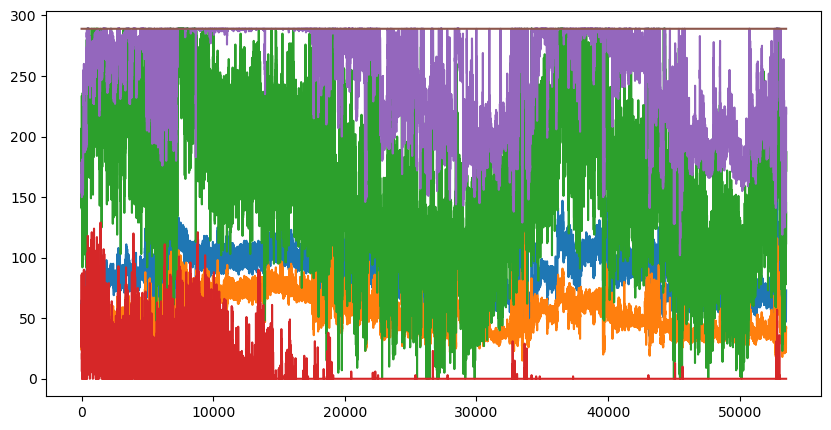

In [34]:
plt.figure(figsize=[10, 5])
plt.plot(df['channel_1'])
plt.plot(df['channel_2'])
plt.plot(df['channel_3'])
plt.plot(df['channel_4'])
plt.plot(df['channel_5'])
plt.plot(df['channel_6'])
# plt.xlim([10000, 10150])